In [5]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.size'] = 25
mpl.rc('font',family='Times New Roman')

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:]

def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonZeroMask = csv[a, :]

synDividedMask = np.divide(nonZeroMask[:,4],nonZeroMask[:,3])
synDividedMask = synDividedMask * (64**3)
accurateDataT = np.vstack((nonZeroMask[:,0],nonZeroMask[:,1],nonZeroMask[:,2],synDividedMask))
accurateData = accurateDataT.T

cleaned = accurateData[accurateData[:,0] >= 409]
cleaned = cleaned[cleaned[:,0] <= 3529]
cleaned = cleaned[cleaned[:,1] >= 1564]
cleaned = cleaned[cleaned[:,1] <= 3124]

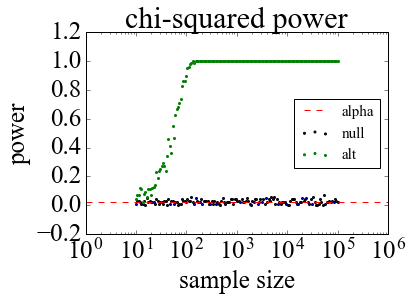

In [13]:
from scipy import stats
import itertools
import scipy.stats as stats

np.random.seed(1)
alpha = .025
num_samples = 150
N = np.sum(cleaned[:, -1]) #total data set size
L = np.unique(cleaned[:, 2]) #list of labels

sample_sizes = np.logspace(1.0, 5.0, num=num_samples, base=10.0) #sample sizes
repeats = 100

#sample data from null hypothesis
pi_null = np.array([1.0/float(len(L))]*len(L))
power_null = []
for s in sample_sizes:
    power = 0
    Expected_i = pi_null*s
    for r in xrange(repeats):
        null_data = np.random.multinomial(s, pi_null)
        chi_sq = stats.chisquare(null_data, Expected_i)
        p_value = chi_sq[1]
        if p_value < alpha:
            power = power + 1
    power_null.append(float(power)/float(repeats))

#sample data from alternate hypothesis
power_alt = []
pi_alt = np.random.rand(len(L)) # create a pi vector (random probabilities)
pi_alt = pi_alt/np.sum(pi_alt) # normalize
for s in sample_sizes:
    power = 0
    E_i = pi_null*s # all labels have equal expectancy
    for r in xrange(repeats):
        alt_data = np.random.multinomial(s, pi_alt) # use pi vector to gen data
        chi_sq = stats.chisquare(alt_data, E_i)
        p_value = chi_sq[1]
        # can we reject the null hypothesis
        if p_value < alpha:
            power = power + 1
    power_alt.append(float(power)/float(repeats))
    
plt.scatter(sample_sizes, power_null, hold=True, label='null', s=4)
plt.scatter(sample_sizes, power_alt, color='green', hold=True, label='alt', s=4)
plt.title('chi-squared power')
plt.xlabel('sample size')
plt.xscale('log')
plt.ylabel('power')
plt.axhline(alpha, color='red', linestyle='--', label='alpha')
plt.legend(loc=5,fontsize=15)
plt.subplots_adjust(bottom = 0.2)
plt.subplots_adjust(left = 0.2)
plt.savefig('Fig9.pdf', format='pdf', dpi=1000)
plt.show()